In [1]:
## loading libraries in memory 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import eda_functions as eda

import scipy
from scipy import stats

## For encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics ## confusion_matrix, accuracy_score, classification_report

## logistic regression 
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('activity.csv')
df.columns = ['independent', 'responce']

In [3]:
## Defining the dependent and independent variable
X = df[['independent']]
y = df[['responce']]

## Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [4]:
## model definition, fitting also.
concated = pd.concat([X, y], axis=1)
concated.columns = columns=['independent', 'responce']
formula = " responce ~ independent "
m1 = smf.logit(formula=formula, data=concated).fit()

Optimization terminated successfully.
         Current function value: 0.080459
         Iterations 9


In [44]:
m1.__dir__()

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_endog_name',
 '_get_robustcov_results',
 '_use_t',
 'aic',
 'bic',
 'bse',
 'conf_int',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'f_test',
 'fittedvalues',
 'get_margeff',
 'initialize',
 'k_constant',
 'llf',
 'llnull',
 'llr',
 'llr_pvalue',
 'load',
 'mle_retvals',
 'mle_settings',
 'model',
 'nobs',
 'normalized_cov_params',
 'params',
 'pred_table',
 'predict',
 'prsquared',
 'pvalues',
 'remove_data',
 'resid_dev',
 'resid_generalized',
 'resid_pearson',
 'resid_response',
 'save',
 'scale',
 'set_null_options',
 'summary'

In [47]:
m1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.884      
Dependent Variable: responce         AIC:              83.4932    
Date:               2023-06-26 15:16 BIC:              91.8983    
No. Observations:   494              Log-Likelihood:   -39.747    
Df Model:           1                LL-Null:          -342.16    
Df Residuals:       492              LLR p-value:      1.4993e-133
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       6.7454    0.8102   8.3254  0.0000   5.1574   8.3333
independent    -0.1309    0.0146  -8.9846  0.0000  -0.1595  -0.1024
==================================================================

"""

In [48]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               responce   No. Observations:                  494
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.8838
Time:                        15:16:46   Log-Likelihood:                -39.747
converged:                       True   LL-Null:                       -342.16
Covariance Type:            nonrobust   LLR p-value:                1.499e-133
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7454      0.810      8.325      0.000       5.157       8.333
independent    -0.1309      0.015     -8.985      0.000      -0.159      -0.102
===============================================================================
"""

In [7]:
# performing predictions on the test dataset
y_pred = m1.predict(X_test)
prediction = list(map(round, y_pred))
  
# comparing original and predicted values of y
#print('Actual values', list(y_test.values))
print('Predictions :', prediction)

Predictions : [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1]


In [9]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', metrics.accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[70  2]
 [ 1 76]]
Test accuracy =  0.9798657718120806


In [49]:
## Note there is a lot of different metrics.
#metrics.__dir__()


In [19]:
## Precision Score
metrics.precision_score(y_test, prediction)

0.9743589743589743

In [20]:
## Recall Score
metrics.recall_score(y_test, prediction)

0.987012987012987

In [21]:
## Accuracy Score
metrics.accuracy_score(y_test, prediction)

0.9798657718120806

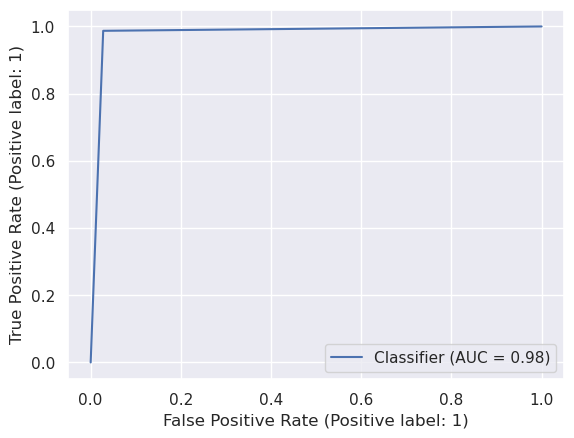

In [54]:
## ROC 

## Do we do with the probabilities or actual prediction.??
metrics.RocCurveDisplay.from_predictions(y_test, prediction)
plt.show()

In [53]:
## AUC stands for area under the ROC curve
metrics.roc_auc_score(y_test, prediction)

0.9796176046176045

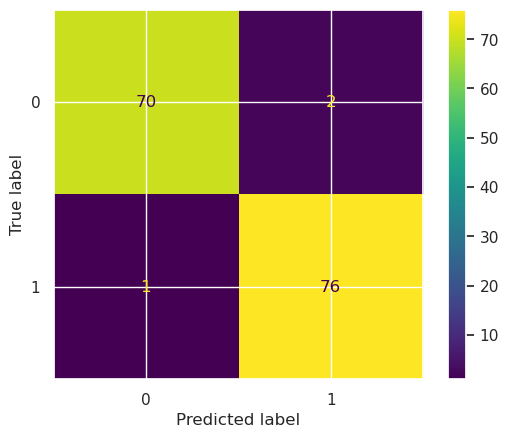

In [37]:
## Confusion Maatrix
cm = metrics.confusion_matrix(y_test, prediction)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot();

In [36]:
## and a Classification report
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.97      0.99      0.98        77

    accuracy                           0.98       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.98      0.98      0.98       149

